In [20]:
import numpy as np

dim = 10
uniform = np.array([1/dim] *dim)
dirac = [0.1/(dim-1)] * dim
dirac[0] = 0.9
dirac = np.array(dirac)

print(uniform, dirac)

def kl_divergence(p, q):
    eps = 1E-10
    p = p+eps
    q = q+eps
    return np.sum(p * np.log(p / q))

initial_div = kl_divergence(uniform, dirac)
initial_div

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1] [0.9        0.01111111 0.01111111 0.01111111 0.01111111 0.01111111
 0.01111111 0.01111111 0.01111111 0.01111111]


1.7577796565156443

In [180]:
def exponential_decay(beta, t, p, q):
    decayed = p * q**(beta/t)
    decayed = decayed / np.sum(decayed)
    #print(t, decayed.tolist())
    return decayed

def exponential_approach(num_steps, uniform, dirac, beta=2):
    ed_list = []
    for t in range(1, num_steps+1):
        decayed = exponential_decay(beta, t, uniform, dirac)
        kld = kl_divergence(uniform, exponential_decay(beta, t, uniform, dirac))
        ed_list.append(kld)
    return ed_list

In [181]:
res = exponential_approach(50, uniform, dirac, beta=1)

In [182]:
def autoregressive_decay(alpha, p, q):
    ar = alpha * q + (1 - alpha) * p
    ar = ar / np.sum(ar)
    return ar

def autoregressive_approach(num_steps, uniform, dirac, beta=2, alpha=0.6, num_steps_prior_enter=1):
    res = list()
    last_dist = uniform
    for i in range(1,num_steps+1):
        if i < num_steps_prior_enter+1:
            dist_to_enter = dirac * beta
        else:
            dist_to_enter = uniform
        
        last_dist = autoregressive_decay(alpha, last_dist, dist_to_enter)
        res.append(kl_divergence(uniform, last_dist))
    return res
    

In [197]:
num_steps = 50
res_ex10 = exponential_approach(num_steps, uniform, dirac, beta=10)
res_ex2 = exponential_approach(num_steps, uniform, dirac, beta=2)
res_ex = exponential_approach(num_steps, uniform, dirac, beta=1)
res_ar_25 = autoregressive_approach(num_steps, uniform, dirac, beta=100, alpha=0.08, num_steps_prior_enter=10)
x = np.array(range(1,num_steps+1))


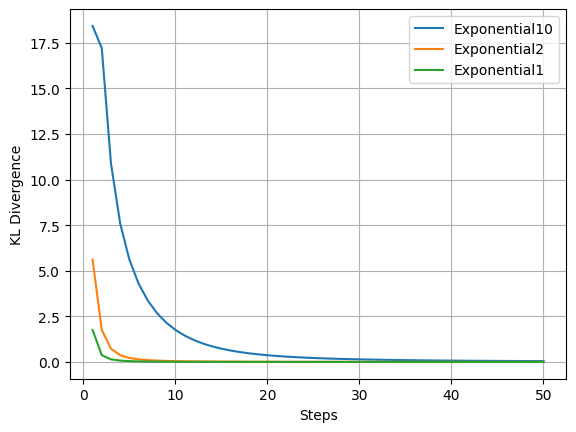

In [198]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, res_ex10, label='Exponential10')
ax.plot(x, res_ex2, label='Exponential2')
ax.plot(x, res_ex, label='Exponential1')
#ax.plot(x, res_ar_25, label='Autoregressive-alpha0.08-entering_steps5-beta100')

ax.set(xlabel='Steps', ylabel='KL Divergence')
ax.grid()
plt.legend()
plt.savefig('DecayingTest.png')
plt.show()

In [162]:
!pip install matplotlib